In [1]:
import numpy as np

In [55]:
# 입력 문장(모델입력)
raw_inputs = [
             "나는 학생 입니다",
             "나는 좋은 선생님 입니다",
             "당신은 매우 좋은 선생님 입니다"
]

# 정답 학생(1) 기타(0)
raw_labels = [1, 0, 0]

In [56]:
words = []
for s in raw_inputs:
    words.extend(s.split())

In [57]:
print(words)

['나는', '학생', '입니다', '나는', '좋은', '선생님', '입니다', '당신은', '매우', '좋은', '선생님', '입니다']


In [58]:
# 중복 단어 제거(fromekys)
words = list(dict.fromkeys(words))

In [59]:
print(words)

['나는', '학생', '입니다', '좋은', '선생님', '당신은', '매우']


In [60]:
# <pad>나 <unk> <oov> 앞쪽에 넣는 이유는?
# <pad>나 <unk> <oov>를 뒤에 넣으면 못쓰는 단어를 제거할 때 제거됨 -> 그래서 치환을 위한 <pad>나 <unk> <oov> 토큰은 앞쪽에 배치한다.
word_to_id = {"<PAD>" : 0, "<UNK>" : 1}
for w in words:
    word_to_id[w] = len(word_to_id)
    print(word_to_id)

{'<PAD>': 0, '<UNK>': 1, '나는': 2}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7}
{'<PAD>': 0, '<UNK>': 1, '나는': 2, '학생': 3, '입니다': 4, '좋은': 5, '선생님': 6, '당신은': 7, '매우': 8}


In [61]:
word_to_id.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('나는', 2), ('학생', 3), ('입니다', 4), ('좋은', 5), ('선생님', 6), ('당신은', 7), ('매우', 8)])

In [62]:
id_to_words = {i : w for w,i in word_to_id.items()} # 위 순서를 ('<PAD>', 0) -> 아래 처럼 바꿈 0: '<PAD>'

In [63]:
print(id_to_words)

{0: '<PAD>', 1: '<UNK>', 2: '나는', 3: '학생', 4: '입니다', 5: '좋은', 6: '선생님', 7: '당신은', 8: '매우'}


In [64]:
train_inputs = []
for s in raw_inputs:
    row = [word_to_id[w] for w in s.split()]
    # padding
    row += [0] * (5-len(row))
    train_inputs.append(row)

train_inputs = np.array(train_inputs)
print(train_inputs)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [65]:
train_inputs.shape

(3, 5)

In [66]:
# one-hot matrix 생성
onehot_matrix = np.eye(len(word_to_id))
print(onehot_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [67]:
train_onehot = onehot_matrix[train_inputs]
print(train_onehot)

[[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]]


In [68]:
train_onehot.shape

(3, 5, 9)

In [69]:
print(np.argmax(train_onehot, axis = -1)) # 디코딩해서 복원

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [70]:
# embedding layer 만들기
x = np.argmax(train_onehot, axis = -1)

In [71]:
# 컨틴뉴어스(유사도 측정)하게 만들기
import tensorflow as tf
import tensorflow.keras.layers as L

In [72]:
x_len = train_onehot.shape

In [73]:
print(x_len)

(3, 5, 9)


In [74]:
inp = tf.convert_to_tensor(x, dtype=tf.int32)

In [75]:
inp_len = tf.convert_to_tensor(x_len, dtype=tf.int32)

In [76]:
print(inp)
print(inp_len)

tf.Tensor(
[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]], shape=(3, 5), dtype=int32)
tf.Tensor([3 5 9], shape=(3,), dtype=int32)


In [77]:
inp, inp_len

(<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
 array([[2, 3, 4, 0, 0],
        [2, 5, 6, 4, 0],
        [7, 8, 5, 6, 4]], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 5, 9], dtype=int32)>)

In [78]:
vocab = 1000
dim = 3
embed = L.Embedding(vocab, dim)

In [79]:
embed(inp)

<tf.Tensor: shape=(3, 5, 3), dtype=float32, numpy=
array([[[-0.00580071,  0.00617013, -0.00488377],
        [-0.00292176, -0.02051076, -0.01761572],
        [-0.01941736,  0.00586569, -0.03616071],
        [-0.04629523, -0.00191419, -0.04971854],
        [-0.04629523, -0.00191419, -0.04971854]],

       [[-0.00580071,  0.00617013, -0.00488377],
        [ 0.00760029, -0.04863347, -0.01929743],
        [-0.02633586,  0.03025062, -0.01923863],
        [-0.01941736,  0.00586569, -0.03616071],
        [-0.04629523, -0.00191419, -0.04971854]],

       [[ 0.03672161,  0.03492827, -0.04031935],
        [ 0.03348413,  0.03622561, -0.01029604],
        [ 0.00760029, -0.04863347, -0.01929743],
        [-0.02633586,  0.03025062, -0.01923863],
        [-0.01941736,  0.00586569, -0.03616071]]], dtype=float32)>

# Word2Vec

## abc 뉴스데이터로 word2vec

In [81]:
from nltk.corpus import abc
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [82]:
corpus = abc.sents()

In [83]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [84]:
print("코퍼스의 크기 :", len(corpus))

코퍼스의 크기 : 29059


In [ ]:
from gensim.models import Word2Vec
model =

## 한국어 word2vec 만들기

In [15]:
!pip install konlpy

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [17]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fca165f0c50>)

In [18]:
train_data = pd.read_table('ratings.txt')

In [19]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [20]:
print(len(train_data))

200000


In [21]:
# Null값의 존재 유무확인
print(train_data.isnull().values.any())

True


In [22]:
train_data = train_data.dropna(how='any') # null값이 존재하는 행 제거
print(train_data.isnull().values.any())

False


In [23]:
print(len(train_data))

199992


In [24]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣] ","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [25]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이...,1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.최고.,1
3,9251303,와.연기가 진짜 개쩔구나.지루할거라고 생각했는데 몰입해서 봤다.그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [26]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [27]:
# 불용어 제거 및 토큰화 적용
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_x)

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 11.918556742269692


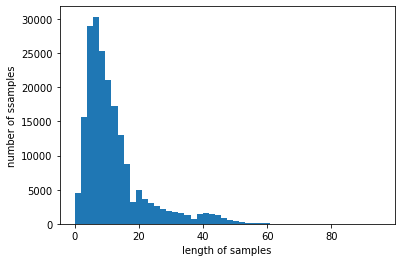

In [28]:
# 리뷰의 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of ssamples')
plt.show()

In [29]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window=5, min_count = 5, workers=4, sg=0)

In [30]:
model.wv.vectors.shape

(17532, 100)

In [31]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8761107921600342), ('안성기', 0.8589544892311096), ('최민수', 0.8311047554016113), ('김명민', 0.8276619911193848), ('워싱턴', 0.8276300430297852), ('김수현', 0.8247652053833008), ('이민호', 0.821141242980957), ('안내상', 0.8211012482643127), ('안소니', 0.8158079385757446), ('엄정화', 0.8133124709129333)]


In [32]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8774140477180481), ('호러', 0.8510007858276367), ('무협', 0.8376799821853638), ('무비', 0.8334944844245911), ('SF', 0.8294780254364014), ('느와르', 0.8277759552001953), ('물의', 0.8187370300292969), ('하이', 0.810957670211792), ('고어', 0.8062209486961365), ('블록버스터', 0.8059481382369995)]


# 사전 훈련된 워드 임베딩 (한국어)

In [35]:
import gensim
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/NLP/dataset/ko.bin')

In [36]:
print(model)

Word2Vec(vocab=30185, size=200, alpha=0.025)


In [37]:
result = model.wv.most_similar("강아지", topn=50) # 상위 50개
result

[('고양이', 0.7290452718734741),
 ('거위', 0.7185635566711426),
 ('토끼', 0.7056223154067993),
 ('멧돼지', 0.6950401067733765),
 ('엄마', 0.6934334635734558),
 ('난쟁이', 0.6806551218032837),
 ('한마리', 0.6770296096801758),
 ('아가씨', 0.6750352382659912),
 ('아빠', 0.6729634404182434),
 ('목걸이', 0.6512460708618164),
 ('까마귀', 0.6500682830810547),
 ('아주머니', 0.6432187557220459),
 ('독사', 0.6389124393463135),
 ('고슴도치', 0.6313384771347046),
 ('거북이', 0.6252505779266357),
 ('돼지', 0.6222692131996155),
 ('앵무새', 0.6218831539154053),
 ('개구리', 0.6218565702438354),
 ('당나귀', 0.6206705570220947),
 ('송아지', 0.6165446043014526),
 ('구미호', 0.615827202796936),
 ('메두사', 0.6134721040725708),
 ('사냥개', 0.6131488084793091),
 ('악어', 0.6128274202346802),
 ('뱀파이어', 0.6126487255096436),
 ('맹수', 0.609540581703186),
 ('갈기', 0.6087672114372253),
 ('아저씨', 0.6054108142852783),
 ('바구니', 0.6049458980560303),
 ('샴푸', 0.6020784974098206),
 ('잠자리', 0.6012549996376038),
 ('요괴', 0.6010540127754211),
 ('기러기', 0.6004207134246826),
 ('아기', 0.6002471446

In [38]:
result = model.wv.most_similar("박준영", topn=50) # 상위 50개
result

KeyError: ignored

# 사전 훈련된 워드 임베딩 (영어)

In [39]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/NLP/dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [40]:
print(model.vectors.shape)

(3000000, 300)


In [41]:
print(model.similarity('this' , 'is'))

0.40797037


In [42]:
print(model.similarity('post' , 'book'))

0.057204384


In [43]:
print(model['book']) # 300차원

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

# Glove 훈련시키기

In [66]:
!pip install glove_python_binary

In [67]:
from glove import Corpus, Glove

In [68]:
corpus = Corpus()

In [69]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fca0f1600d0>)

In [71]:
import re
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

LookupError: ignored

In [59]:
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05) # 훈련데이터로 부터 glove에 사용할 동시 행렬 생성

TypeError: ignored